In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
filepath=r'C:\Users\vijay\OneDrive\Desktop\Datafiles of nareshit\Visadataset.csv'
visa_df=pd.read_csv(filepath)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [9]:
cat_column=visa_df.select_dtypes(include='object').columns
cat_column
num_column=visa_df.select_dtypes(exclude='object').columns
num_column

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

- I want how certified from asia 
- i want how people deined from asia 

In [12]:
labels=visa_df['continent'].unique()
certi_count,deni_count=[],[]
for i in labels:
    cond1=visa_df['continent']==i
    cond2=visa_df['case_status']=='Certified'
    cond3=visa_df['case_status']=='Denied'
    certi_cond=cond1 & cond2
    deni_cond=cond1 & cond3

    certi_count.append(len(visa_df[certi_cond]))
    deni_count.append(len(visa_df[deni_cond]))
data=zip(certi_count,deni_count)
analysis_df=pd.DataFrame(data,columns=['Certified','Denied'],index=labels)
analysis_df

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


<Axes: >

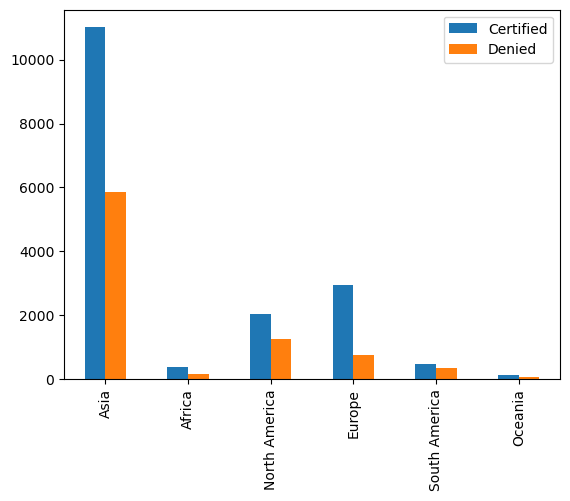

In [14]:
analysis_df.plot(kind='bar')

**Instead of numbers always show the insights using the percentages**

In [17]:
labels=visa_df['continent'].unique()
cert_perc,deni_perc=[],[]
for i in labels:
    condition1=visa_df[visa_df['continent']==i]
    condition2=condition1['case_status'].value_counts(normalize=True)*100
    cert_cond=condition2.get('Certified',0)
    deni_cond=condition2.get('Denied',0)

    cert_perc.append(cert_cond)
    deni_perc.append(deni_cond)
percentage_data=zip(cert_perc,deni_perc)
analyzing_percentage=pd.DataFrame(percentage_data,columns=['Certified','Denied'],index=labels)
analyzing_percentage

,Certified,Denied
Asia,65.310480,34.689520
Africa,72.050817,27.949183
North America,61.877278,38.122722
Europe,79.233655,20.766345
South America,57.863850,42.136150
Oceania,63.541667,36.458333


In [19]:
labels = visa_df['continent'].unique()
certi_percent, deni_percent = [], []

for i in labels:
    continent_df = visa_df[visa_df['continent'] == i]
    status_percent = continent_df['case_status'].value_counts(normalize=True) * 100

    certi_percent.append(round(status_percent.get('Certified', 0), 2))
    deni_percent.append(round(status_percent.get('Denied', 0), 2))

data = zip(certi_percent, deni_percent)
analysis_df3 = pd.DataFrame(data, columns=['Certified (%)', 'Denied (%)'], index=labels)
print(analysis_df3)


               Certified (%)  Denied (%)
Asia                   65.31       34.69
Africa                 72.05       27.95
North America          61.88       38.12
Europe                 79.23       20.77
South America          57.86       42.14
Oceania                63.54       36.46


In [22]:
visa_df['case_status'].value_counts(normalize=True)*100

case_status
Certified    66.789639
Denied       33.210361
Name: proportion, dtype: float64

In [25]:
col1=visa_df['continent']
col2=visa_df['case_status']

analysis_df1=pd.crosstab(col1,col2)
analysis_df1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

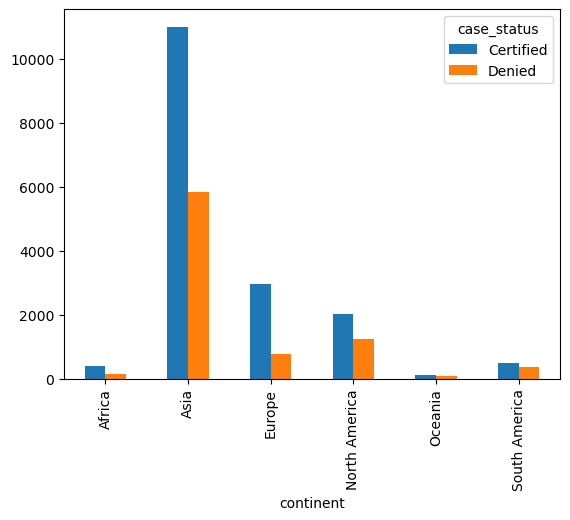

In [27]:
analysis_df1.plot(kind='bar')

**Multivariate Analysis**

In [29]:
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
cols=[col2,col3]
combination1=pd.crosstab(col1,cols)
combination1

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

<Axes: xlabel='continent'>

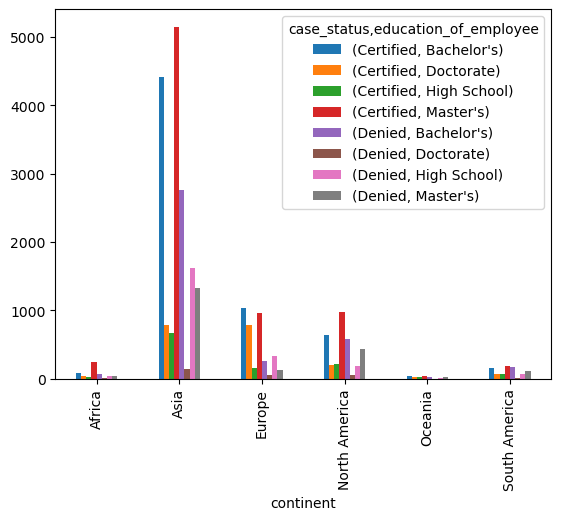

In [31]:
combination1.plot(kind='bar')

In [33]:
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
cols=[col1,col3]
combination2=pd.crosstab(col2,cols)
combination2

continent                 Africa                                      Asia  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
case_status                                                                  
Certified                     81        43          23      250       4407   
Denied                        62        11          43       38       2761   

continent                                                Europe            \
education_of_employee Doctorate High School Master's Bachelor's Doctorate   
case_status                                                                 
Certified                   780         676     5149       1040       788   
Denied                      143        1614     1331        259        58   

continent              ... North America             Oceania            \
education_of_employee  ...   High School Master's Bachelor's Doctorate   
case_status            ...                                               
Certified              ...           210      979         38        19   
Denied                 ...           191      429         28         3   

continent                                  South America            \
education_of_employee High School Master's    Bachelor's Doctorate   
case_status                                                          
Certified                      19       46           160        75   
Denied                         17       22           173        14   

continent                                   
education_of_employee High School Master's  
case_status                                 
Certified                      74      184  
Denied                         63      109  

[2 rows x 24 columns]

<Axes: xlabel='case_status'>

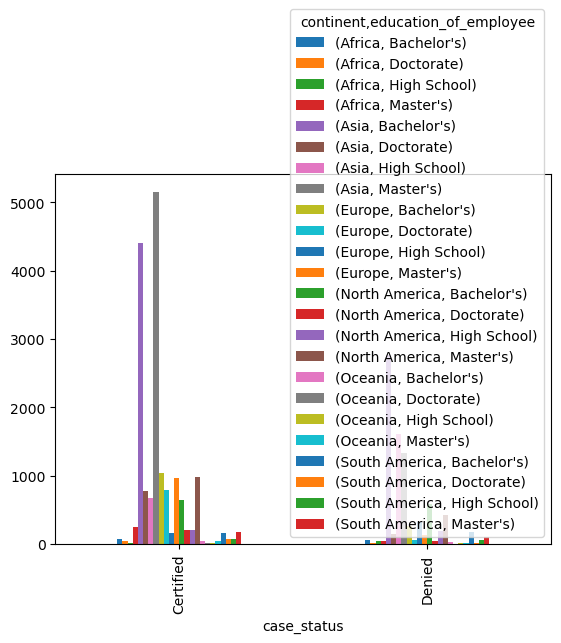

In [35]:
combination2.plot(kind='bar')

In [36]:
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
cols=[col1,col2]
combination3=pd.crosstab(col3,cols)
combination3

continent                Africa             Asia           Europe         \
case_status           Certified Denied Certified Denied Certified Denied   
education_of_employee                                                      
Bachelor's                   81     62      4407   2761      1040    259   
Doctorate                    43     11       780    143       788     58   
High School                  23     43       676   1614       162    328   
Master's                    250     38      5149   1331       967    130   

continent             North America          Oceania        South America  \
case_status               Certified Denied Certified Denied     Certified   
education_of_employee                                                       
Bachelor's                      641    584        38     28           160   
Doctorate                       207     51        19      3            75   
High School                     210    191        19     17            74   
Master's                        979    429        46     22           184   

continent                     
case_status           Denied  
education_of_employee         
Bachelor's               173  
Doctorate                 14  
High School               63  
Master's                 109

<Axes: xlabel='education_of_employee'>

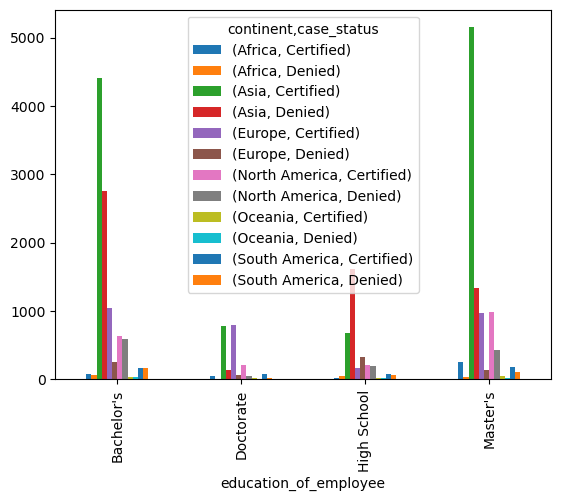

In [39]:
combination3.plot(kind='bar')

**Scatter plots**

- scatter plots will give the relationship graph between two numerical columns

- How one variable is Varying according another Variable

- If we want get a value we need to do **correlation**

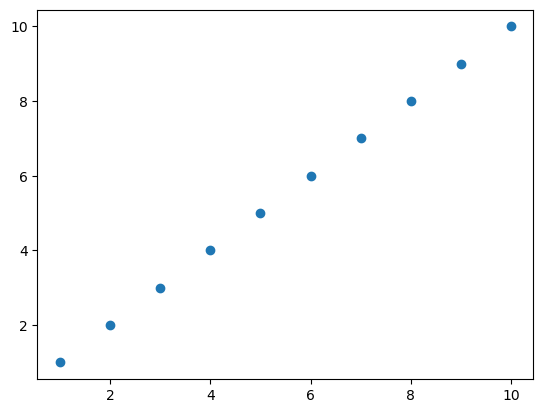

In [42]:
x=range(1,11)
y=range(1,11)
plt.scatter(x,y)


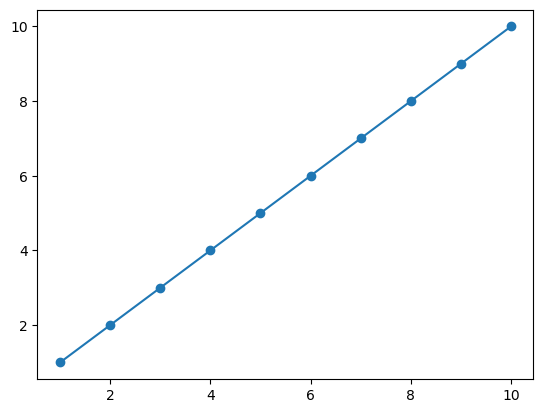

In [44]:
x=range(1,11)
y=range(1,11)
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

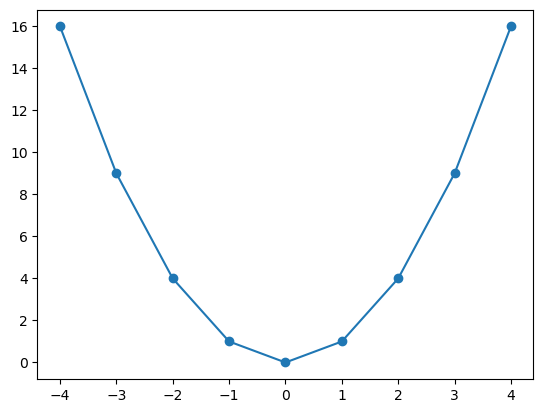

In [46]:
x=range(-4,5)
y=[i*i for i in range(-4,5)]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [48]:
num_column

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

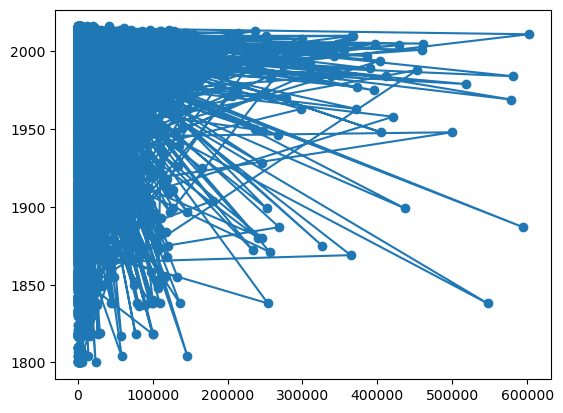

In [50]:
cond1=visa_df['no_of_employees'].values
cond2=visa_df['yr_of_estab'].values
cond3=visa_df['prevailing_wage'].values
plt.scatter(cond1,cond2)
plt.plot(cond1,cond2)
plt.show()

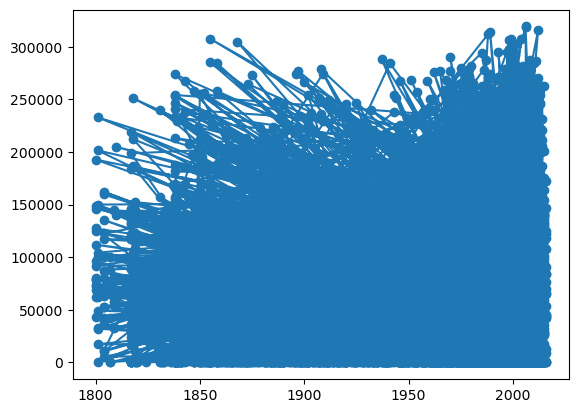

In [52]:
cond1=visa_df['no_of_employees'].values
cond2=visa_df['yr_of_estab'].values
cond3=visa_df['prevailing_wage'].values
plt.scatter(cond2,cond3)
plt.plot(cond2,cond3)
plt.show()

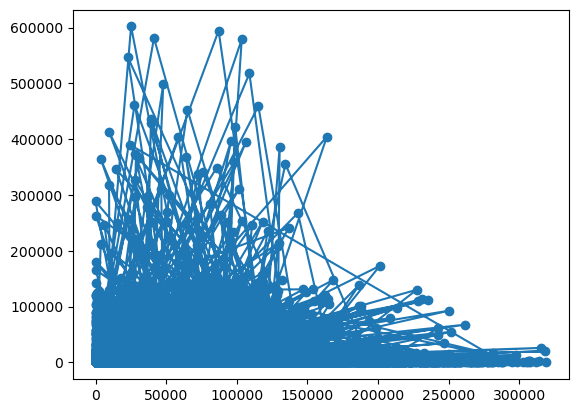

In [54]:
cond1=visa_df['no_of_employees'].values
cond2=visa_df['yr_of_estab'].values
cond3=visa_df['prevailing_wage'].values
plt.scatter(cond3,cond1)
plt.plot(cond3,cond1)
plt.show()

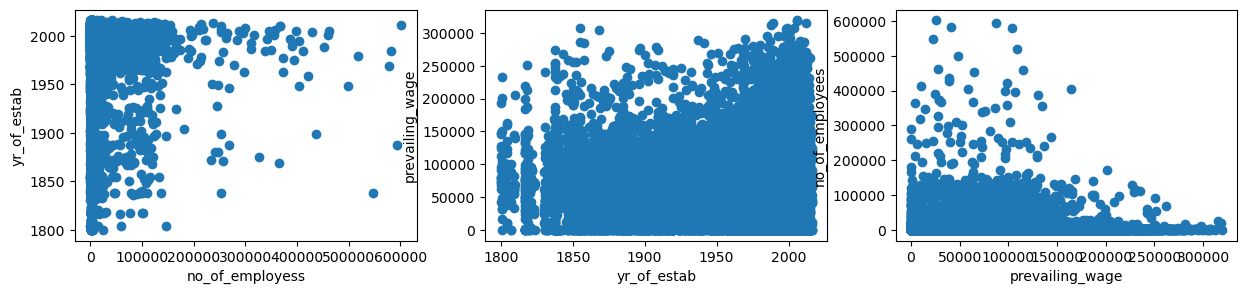

In [56]:
cond1=visa_df['no_of_employees'].values
cond2=visa_df['yr_of_estab'].values
cond3=visa_df['prevailing_wage'].values
plt.figure(figsize=(15,3))
plt.subplot(1,3,1).scatter(cond1,cond2)
plt.xlabel('no_of_employess')
plt.ylabel('yr_of_estab')
plt.subplot(1,3,2).scatter(cond2,cond3)
plt.xlabel('yr_of_estab')
plt.ylabel('prevailing_wage')
plt.subplot(1,3,3).scatter(cond3,cond1)
plt.xlabel('prevailing_wage')
plt.ylabel('no_of_employees')
plt.show()

**Correlation**

In [59]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Heat Map**

<Axes: >

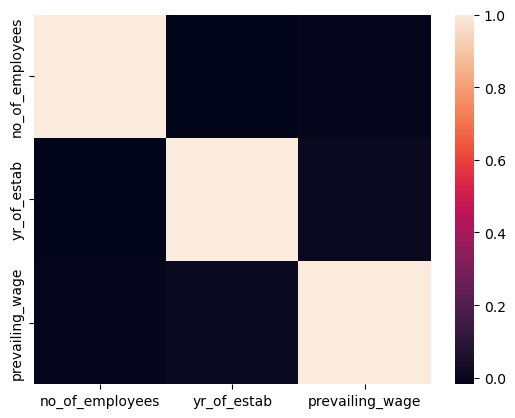

In [62]:
corr_visa=visa_df.corr(numeric_only=True)
sns.heatmap(corr_visa)

<Axes: >

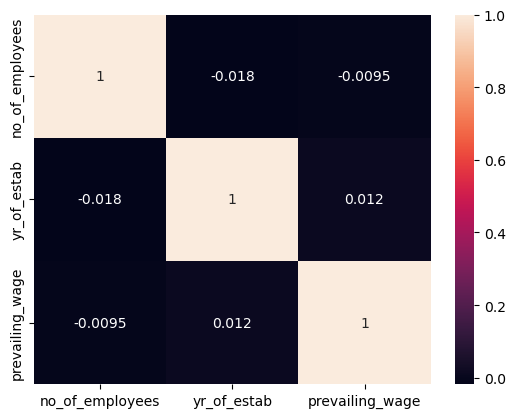

In [64]:
corr_visa=visa_df.corr(numeric_only=True)
sns.heatmap(corr_visa,annot=True)

In [66]:
file_path=r'C:\Users\vijay\OneDrive\Desktop\Datafiles of nareshit\winequality_red.csv'
wine_df=pd.read_csv(file_path)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [68]:
wine_corr=wine_df.corr()
wine_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

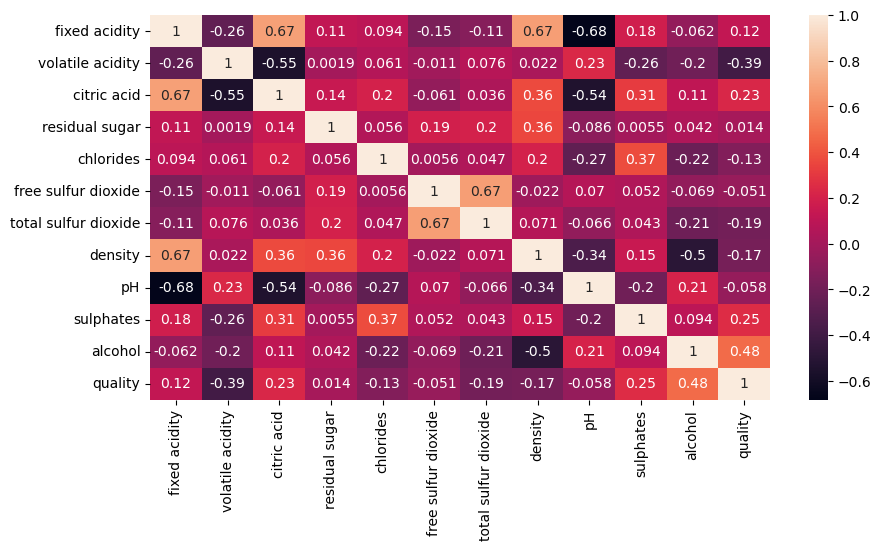

In [70]:
plt.figure(figsize=(10,5))

sns.heatmap(wine_corr,annot=True)